*** Give threshold for upper and lower ****<br>
-> Here we decide the upper and lower on bases of percentile
-> EG:- upper:- 0.99 percentile
        lower:- 0.01

        Differance between upper and lower should be symetric 
        Here 1 is deducted from 100 and add 1 from 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("placement.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<h3>Before percentile on cgpa</h3>

<Axes: xlabel='cgpa'>

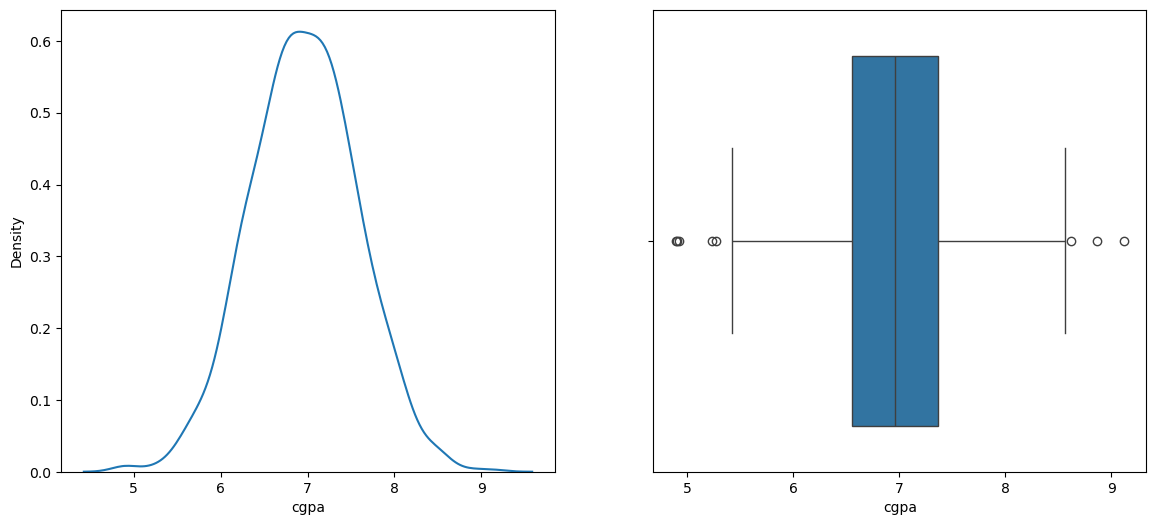

In [5]:
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(df["cgpa"],ax=ax1)
sns.boxplot(x=df["cgpa"],ax=ax2)

On cgpa

In [19]:
upper = df["cgpa"].quantile(99.5/100)
lower = df["cgpa"].quantile(0.5/100)
df[(df["cgpa"]<lower) | (df["cgpa"]>upper)]

,cgpa,placement_exam_marks,placed
150,8.53,22.0,0
278,5.23,17.0,1
440,8.56,22.0,0
485,4.92,44.0,1
815,5.27,43.0,0
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


<h3>Trimming</h3>

     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
990  6.17                  33.0       1
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0

[990 rows x 3 columns]


<Axes: xlabel='cgpa'>

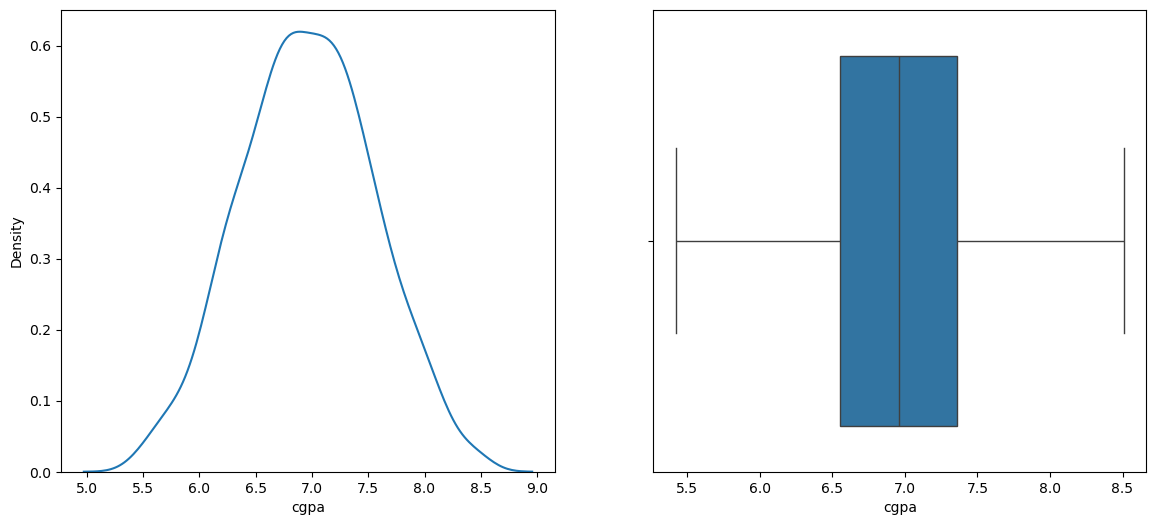

In [20]:
new_df = df[(df["cgpa"]>lower) & (df["cgpa"]<upper)]
print(new_df)
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(new_df["cgpa"],ax=ax1)
sns.boxplot(x=new_df["cgpa"],ax=ax2)

<h3>capping</h3>

<Axes: xlabel='cgpa'>

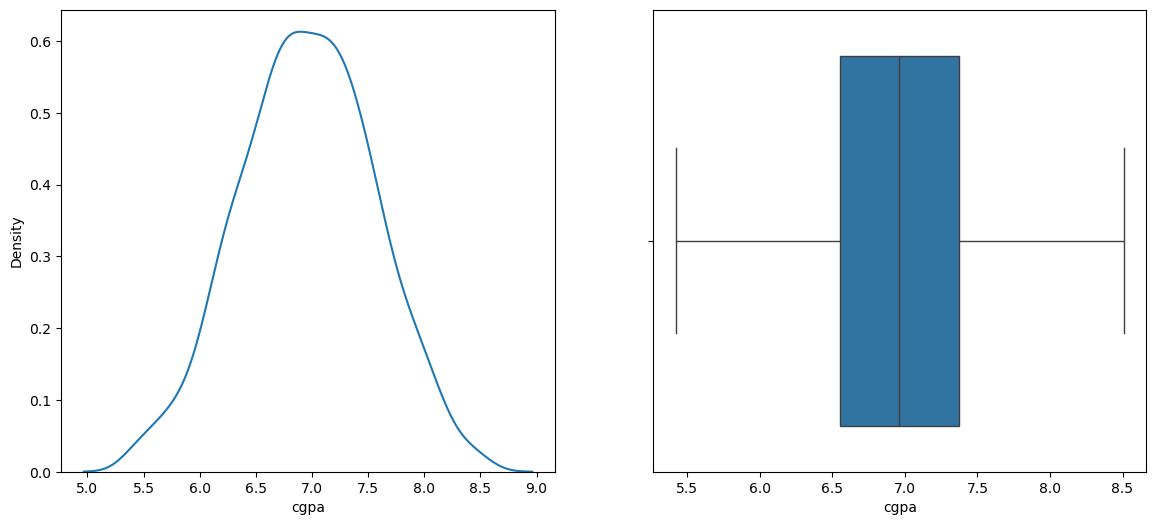

In [23]:
df["cgpa"]=np.where(
    df["cgpa"]<lower,
    lower,
    np.where(
        df["cgpa"]>upper,
        upper,
        df["cgpa"]
    )
)
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(df["cgpa"],ax=ax1)
sns.boxplot(x=df["cgpa"],ax=ax2)

On placement_exam_marks

<h3>Before percentile on placement_exam_marks</h3>

<Axes: xlabel='placement_exam_marks'>

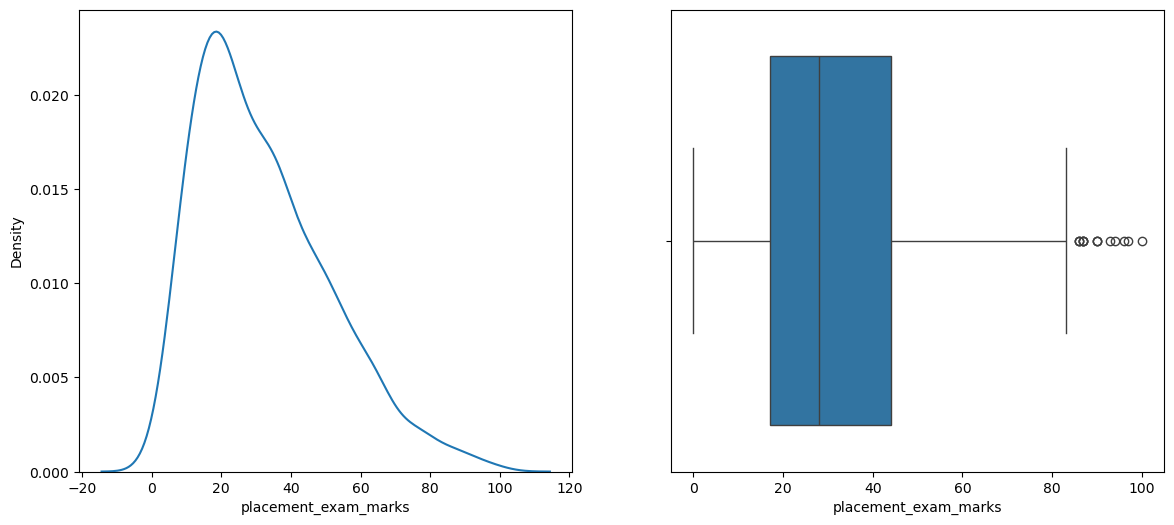

In [24]:
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(df["placement_exam_marks"],ax=ax1)
sns.boxplot(x=df["placement_exam_marks"],ax=ax2)

In [45]:
upper = df["placement_exam_marks"].quantile(98.5/100)
lower = df["placement_exam_marks"].quantile(1.5/100)
df[(df["placement_exam_marks"]<lower) | (df["placement_exam_marks"]>upper)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
74,6.16,3.0,1
117,7.11,0.0,1
134,6.33,93.0,0
162,7.80,90.0,0
219,5.48,3.0,0
274,7.13,4.0,1
283,7.09,87.0,0


<h3>Trimming</h3>

        cgpa  placement_exam_marks  placed
0    7.19000                  26.0       1
1    7.46000                  38.0       1
2    7.54000                  40.0       1
3    6.42000                   8.0       1
4    7.23000                  17.0       0
..       ...                   ...     ...
995  7.51010                  44.0       1
996  7.51010                  65.0       1
997  5.41925                  34.0       0
998  7.51010                  46.0       1
999  5.41925                  10.0       1

[965 rows x 3 columns]


<Axes: xlabel='placement_exam_marks'>

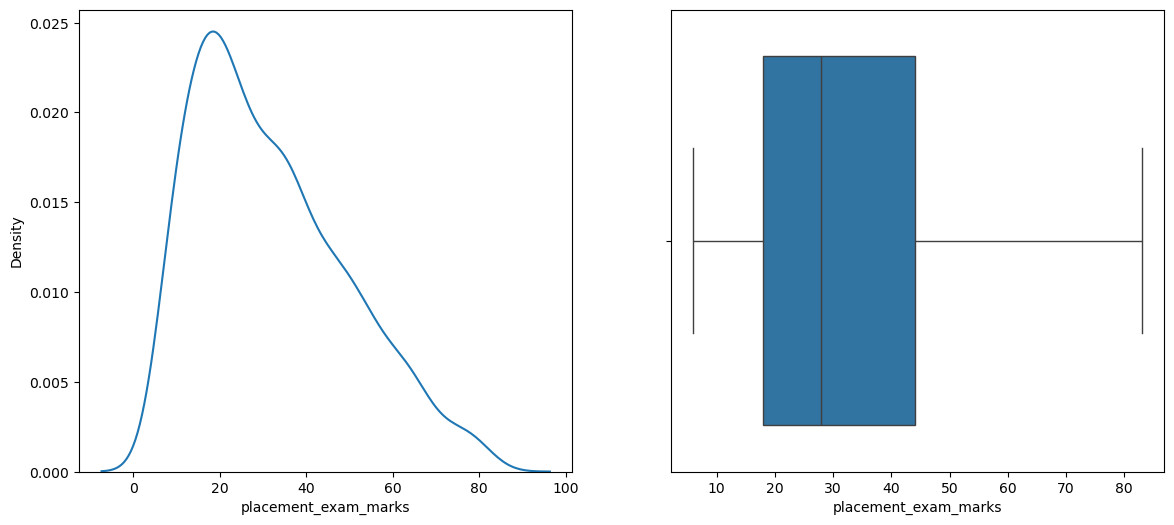

In [46]:
new_df = df[(df["placement_exam_marks"]>lower) & (df["placement_exam_marks"]<upper)]
print(new_df)
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(new_df["placement_exam_marks"],ax=ax1)
sns.boxplot(x=new_df["placement_exam_marks"],ax=ax2)

<h3>capping</h3>

<Axes: xlabel='placement_exam_marks'>

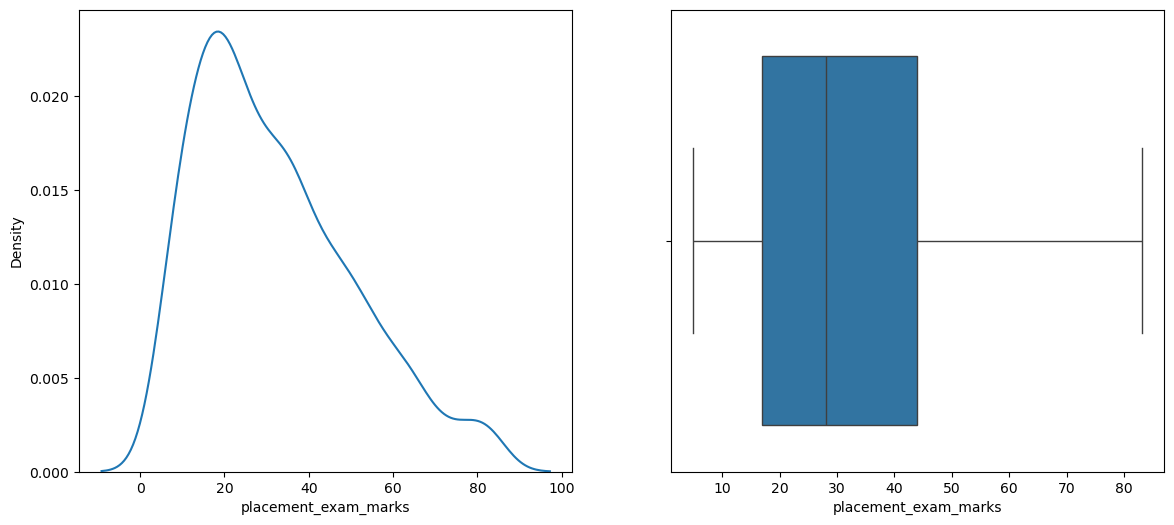

In [47]:
df["placement_exam_marks"]=np.where(
    df["placement_exam_marks"]<lower,
    lower,
    np.where(
        df["placement_exam_marks"]>upper,
        upper,
        df["placement_exam_marks"]
    )
)
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(df["placement_exam_marks"],ax=ax1)
sns.boxplot(x=df["placement_exam_marks"],ax=ax2)